# DeepWorkOut



Extracting the poses of humans without using markers is often essential for measuring behavioral effects in biomechanics. Yet, extracting detailed poses without markers in dynamically changing backgrounds has been challenging. The open source toolbox called DeepLabCut, that builds on a state-of-the-art human pose estimation algorithm, allows a user to train a deep neural network using limited training data to precisely track user-defined features that matches human labeling accuracy. In the following we will train a model that enables us to track, improve and classify the execution of a bodyweight exercise. 
The whole project 'DeepWorkOut' will be realised in 4 steps: 

__1. Point detection with DeepLabCut__

__2. Post-processing and Data Preparation__

__3. Classification of the exercise__

__4. Error detection and correction__

Fact sheet: 
- video lenght: 4s
- Exercises: Plank, Plankvariation, Lunge, Squat, Crunch
- Error detection: Plank 
- Classification: 5 exercises

# 1. Point detection with DeepLabCut

In [9]:
# Author: Carl & Louis Enslin

In [6]:
import deeplabcut as dlc


## Create a new project

In [4]:

project_name = 'DeepWorkOut'
developer = 'Carl & Louis Enslin'
video_path = ['C:\\Users\\ujtjf\\Desktop\\LAMA_Projekt\\Videos']
working_directory = 'C:\\Users\\ujtjf\\Desktop\\LAMA_Projekt\\Deeplabcut_projekt'

#create a variable that holds the path the path to the config.yaml file
config_path = dlc.create_new_project(project_name, developer, video_path, videotype='.avi', working_directory=working_directory, copy_videos=True)


## Change the parameters in config.yaml

The Config.yaml file is the central node of DeepLabCut. This is where the body parts and many important network parameters are stored and adjusted. 
After an interative process we decided to track these bodyparts in the recordings: __ankleft, kneeleft, hipleft, shoulderleft, elbowleft, wristleft, forehead, chin, ankleright, kneeright, hipright, shoulderright, elbowright, wristright, upperback, middleback, lowerback, toesright, toesleft__

Other Parameters:
- p-cutoff: 0.8 (treshhold of the likelihood to differ a certain from an uncertain point)
- Number of frames per video: 20
- Training fraction: 0.95
- General net type: Resnet









## Extract frames and video selection

Critical points and our ideas:
- training should capture the full breadth of the behaviour, however it should be realisible for us

-> Different clothes (log, short, dark, bright), 2 humans (at first we both), monochrome background (at first), diversity in respect to postures, 1 camera angle 

- large frames increases the training time

-> Rreduce video resolution to 480p (results are good enough and training time is not that large)


In [7]:
# 20 frames per video (20 x 20 -> 400 frames -> 8000 bodypoints to label)
# Select the frames automatically and regularly but random from each video

dlc.extract_frames(config_path, mode='automatic', algo='uniform', userfeedback=True)

Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\videos\Ausfallschritt_1.avi ?
yes/noyes
The directory already contains some frames. Do you want to add to it?(yes/no): yes
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 4.7  seconds.
Do you want to extract (perhaps additional) frames for video: C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\videos\Ausfallschritt_2.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\videos\Ausfallschritt_3.avi ?
yes/nono
Do you want to extract (perhaps additional) frames for video: C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\videos\Ausfallschritt_4

KeyboardInterrupt: Interrupted by user

## Label frames

In [ ]:
# Label all the frames in the GUI (in total more than 8000!)
dlc.label_frames(config_path)

# Checking if the labels were created correctly -> good labeling is the base for a working network
dlc.check_labels(config_path)

In [ ]:
# Build a skeleton in the GUI to create one more metric
# Important: Not only the "real" skeleton is created, but also that further connections are made for a good and general model.
dlc.SkeletonBuilder(config_path)

## Create a training set

To benchmark the performance we created different training sets to compare different parameters. In the following we will give a brief overview:
    
In the pose_cfg.yaml we varied different parameters. Since there is already a pre-trained model for the recognition of points on humans, we have limited our training data to the same points and adopted the weights (from the mpii-pose-single-resnet). When this worked well, we added more points (important for us to analyse) and adjusted and improved the following parameters bit by bit: optimizer, batch size, net type, augmentation, learning rate, global scale.
The following worked best:
- optimizer: sgd
- batch size: 4
- net type: renet_101
- augmentation: imgaug
- learning rate: multistep (0.005, 0.02)
- global scale: 1


In [25]:
# num_shuffle: type of our training configuration 
# Create different training dataset to compare after training
dlc.create_training_model_comparison(config_path, num_shuffles=2, net_types=['resnet_101', 'resnet_152'], augmenter_types=['imgaug', 'default'])

dlc.create_training_dataset(config_path, net_type='resnet_101', augmenter_type='imgaug')


The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([352, 435, 453, 218, 614, 466, 449, 573,  26, 310, 576, 764, 457,
           96, 257, 636, 712,  63,  48, 280, 754, 342, 491, 510,  41, 157,
          382, 759, 456, 425, 682, 481, 167, 627, 723, 766, 623, 391, 788,
          665,  65, 375, 607, 263, 397, 387, 744, 725, 402, 635, 249,  99,
          742, 749, 757, 755, 344, 685, 780, 520, 653, 597, 734, 698, 680,
          618, 497, 480, 180,   1, 199, 398, 350, 314, 278, 389, 330, 729,
          782, 476, 545, 414, 643, 794, 226, 547, 143, 206, 390, 441, 502,
          388, 462, 238, 705, 147, 606, 266,  62, 639, 153, 253, 784, 212,
           47, 196, 241, 608, 562,  13, 353, 327, 140, 108,  61,  87, 185,
          166, 341, 767, 695, 574, 455, 380, 191, 415,  38, 182,  31, 404,
          633, 343, 626, 664, 420, 242, 434, 498, 509, 513, 222, 198, 684,
           67, 232, 281, 368, 644, 617, 671, 689,  78, 169, 701, 797, 500,
          558, 800, 245, 359, 366, 485,  75, 557, 233, 556, 117,   5, 732,
          73

## Start training

In [5]:
dlc.train_network(config_path, maxiters=100000, shuffle=4)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18]],
 'all_joints_names': ['ankleleft',
                      'kneeleft',
                      'hipleft',
                      'shoulderleft',
                      'elbowleft',
                      'wristleft',
                      'forehead',
                      'chin',
                      'ankleright',
                      'kneeright',
                      'hipright',
                      'shoulderright',
                      'elbowright',
                      'wristright',
                      'upperback',
                      'middleback',
                      

Selecting single-animal trainer
Starting with imgaug pose-dataset loader (=default).
Batch Size is 4
Initializing ResNet
Loading ImageNet-pretrained resnet_101
Max_iters overwritten as 100000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\ujtjf\\Desktop\\LAMA_Projekt\\Deeplabcut_projekt\\DeepWorkOut-Carl & Louis Enslin-2021-01-31\\dlc-models\\iteration-0\\DeepWorkOutJan31-trainset95shuffle4\\train\\snapshot', 'log_dir': 'log', 'global_scale': 1.0, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 4, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss

iteration: 1000 loss: 0.0249 lr: 0.02
iteration: 2000 loss: 0.0118 lr: 0.02
iteration: 3000 loss: 0.0097 lr: 0.02
iteration: 4000 loss: 0.0087 lr: 0.02
iteration: 5000 loss: 0.0080 lr: 0.02
iteration: 6000 loss: 0.0076 lr: 0.02
iteration: 7000 loss: 0.0071 lr: 0.02
iteration: 8000 loss: 0.0066 lr: 0.02
iteration: 9000 loss: 0.0064 lr: 0.02
iteration: 10000 loss: 0.0062 lr: 0.02
iteration: 11000 loss: 0.0056 lr: 0.005
iteration: 12000 loss: 0.0055 lr: 0.005
iteration: 13000 loss: 0.0054 lr: 0.005
iteration: 14000 loss: 0.0054 lr: 0.005
iteration: 15000 loss: 0.0053 lr: 0.005
iteration: 16000 loss: 0.0053 lr: 0.005
iteration: 17000 loss: 0.0052 lr: 0.005
iteration: 18000 loss: 0.0053 lr: 0.005
iteration: 19000 loss: 0.0052 lr: 0.005
iteration: 20000 loss: 0.0051 lr: 0.005
iteration: 21000 loss: 0.0050 lr: 0.005
iteration: 22000 loss: 0.0051 lr: 0.005
iteration: 23000 loss: 0.0050 lr: 0.005
iteration: 24000 loss: 0.0050 lr: 0.005
iteration: 25000 loss: 0.0049 lr: 0.005
iteration: 26000 lo

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\ujtjf\Anaconda3\envs\Clone DLC\lib\site-packages\tensorflow\python\client\session.py", line 1334, in _do_call
    return fn(*args)
  File "C:\Users\ujtjf\Anaconda3\envs\Clone DLC\lib\site-packages\tensorflow\python\client\session.py", line 1319, in _run_fn
    options, feed_dict, fetch_list, target_list, run_metadata)
  File "C:\Users\ujtjf\Anaconda3\envs\Clone DLC\lib\site-packages\tensorflow\python\client\session.py", line 1407, in _call_tf_sessionrun
    run_metadata)
tensorflow.python.framework.errors_impl.CancelledError: Enqueue operation was cancelled
	 [[{{node fifo_queue_enqueue}}]]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ujtjf\Anaconda3\envs\Clone DLC\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\ujtjf\Anaconda3\envs\Clone DLC\lib\threading.py", line 870, in run
    self._target(*s

## Start evaluating

After training, we evaluated our model using the train/test loss and the pixel error. We achieved a loss of 0.00308 and a test pixel error of 2.37. 

In [8]:
dlc.evaluate_network(config_path, plotting=True, Shuffles=[6])

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18]],
 'all_joints_names': ['ankleleft',
                      'kneeleft',
                      'hipleft',
                      'shoulderleft',
                      'elbowleft',
                      'wristleft',
                      'forehead',
                      'chin',
                      'ankleright',
                      'kneeright',
                      'hipright',
                      'shoulderright',
                      'elbowright',
                      'wristright',
                      'upperback',
                      'middleback',
                      

C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31/evaluation-results/  already exists!
C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\evaluation-results\iteration-0\DeepWorkOutJan31-trainset95shuffle6  already exists!
Running  DLC_resnet101_DeepWorkOutJan31shuffle6_200000  with # of trainingiterations: 200000
This net has already been evaluated!
Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)
C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\evaluation-results\iteration-0\DeepWorkOutJan31-trainset95shuffle6\LabeledImages_DLC_resnet101_DeepWorkOutJan31shuffle6_200000_snapshot-200000  already exists!


100%|██████████| 399/399 [01:21<00:00,  4.91it/s]


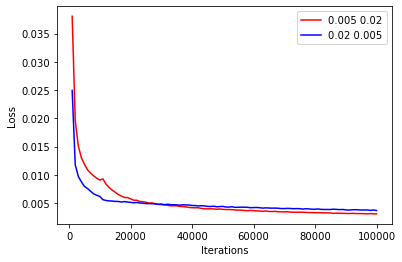

In [1]:
# Plot the loss of our different modells
import pandas as pd
import matplotlib.pyplot as plt
filename1 = 'Deeplabcut_projekt/DeepWorkOut-Carl & Louis Enslin-2021-01-31/dlc-models/iteration-0/DeepWorkOutJan31-trainset95shuffle3/train/learning_stats.csv'
filename2 = 'Deeplabcut_projekt/DeepWorkOut-Carl & Louis Enslin-2021-01-31/dlc-models/iteration-0/DeepWorkOutJan31-trainset95shuffle4/train/learning_stats.csv'

fig, ax = plt.subplots()
colnames = ['Iterations', 'loss', 'lr']
data1 = pd.read_csv(filename1, names=colnames)
data2 = pd.read_csv(filename2, names=colnames)

ax.plot(data1['Iterations'], data1['loss'], label='0.005 0.02', color='red')
ax.plot(data2['Iterations'], data2['loss'], label='0.02 0.005', color='blue')

ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.legend()
plt.show()


## Start analyzing videos

Now that we have a model, we can analyse different videos and then process them. After the analysis of each video we get a file with all the positions of the bodypositions (x, y) and the probability of correctness. These data are further processed in the next section. 

In [15]:
videofile_path = ['C:\\Users\\ujtjf\\Desktop\\LAMA_Projekt\\Testvideos']


In [16]:
dlc.analyze_videos(config_path, videofile_path, videotype='.mov', shuffle=3)


Using snapshot-100000 for model C:\Users\ujtjf\Desktop\LAMA_Projekt\Deeplabcut_projekt\DeepWorkOut-Carl & Louis Enslin-2021-01-31\dlc-models\iteration-0\DeepWorkOutJan31-trainset95shuffle3
Initializing ResNet


  0%|          | 0/596 [00:00<?, ?it/s]

Analyzing all the videos in the directory...
Starting to analyze %  C:\Users\ujtjf\Desktop\LAMA_Projekt\Testvideos\Video_1.mov
C:\Users\ujtjf\Desktop\LAMA_Projekt\Testvideos  already exists!
Loading  C:\Users\ujtjf\Desktop\LAMA_Projekt\Testvideos\Video_1.mov
Duration of video [s]:  20.46 , recorded with  29.13 fps!
Overall # of frames:  596  found with (before cropping) frame dimensions:  640 360
Starting to extract posture


600it [00:10, 55.09it/s]                         

Detected frames:  596
Saving results in C:\Users\ujtjf\Desktop\LAMA_Projekt\Testvideos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet101_DeepWorkOutJan31shuffle3_100000'

## Extract outlier frames

Since the points are not yet perfect, we have now searched the whole video for outliers and selected the corresponding frames. We can correct these frames and thus expand our training set with decisive and critical points. 

In [17]:
video_adress = ['C:\\Users\\ujtjf\\Desktop\\LAMA_Projekt\\Testvideos']
dlc.extract_outlier_frames(config_path, video_adress, shuffle=3)


In [8]:
## Refine labels
dlc.refine_labels(config_path)

In [22]:
dlc.merge_datasets(config_path)

Merged data sets and updated refinement iteration to 2.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create labeled video

In [18]:
# labeled video is created
dlc.create_labeled_video(config_path, video_adress, videotype='.mov', shuffle=3, draw_skeleton=True, trailpoints=4)

Analyzing all the videos in the directory...
